## Libraries and Setup

In [1]:
%pip install scikit-learn matplotlib;

Note: you may need to restart the kernel to use updated packages.


# Assignment 1

## Introduction
In this notebook, we explore logistic regression and linear SVM classifiers using a synthetic dataset. We will visualize the decision boundaries for both models and compare their performance. We also extend the feature set with quadratic features to observe how the decision boundary changes.

## Table of Contents
1. [Data Loading and Visualization](#data-loading-and-visualization)
2. [Logistic Regression Model](#logistic-regression-model)
   - [Training the Model](#training-the-model)
   - [Predictions and Decision Boundary](#predictions-and-decision-boundary)
3. [Linear SVM Classifier](#linear-svm-classifier)
   - [Training SVM Classifier](#training-svm-classifier)
   - [Predictions and Decision Boundary](#predictions-and-decision-boundary-svm)
4. [Extended Features with Quadratic Terms](#extended-features-with-quadratic-terms)
   - [Training with Extended Features](#training-with-extended-features)
   - [Visualizing Predictions with Extended Features](#visualizing-predictions-with-extended-features)
   - [Comparing with Baseline Predictor](#comparing-with-baseline-predictor)
   - [Visualizing Decision Boundary for Quadratic Features](#visualizing-decision-boundary-for-quadratic-features)


## Data Loading and Visualization

    x_1   x_2  target
0  0.91 -0.81      -1
1  0.39  0.32      -1
2 -0.69 -0.85      -1
3  0.62 -0.59      -1
4  0.96  0.61      -1


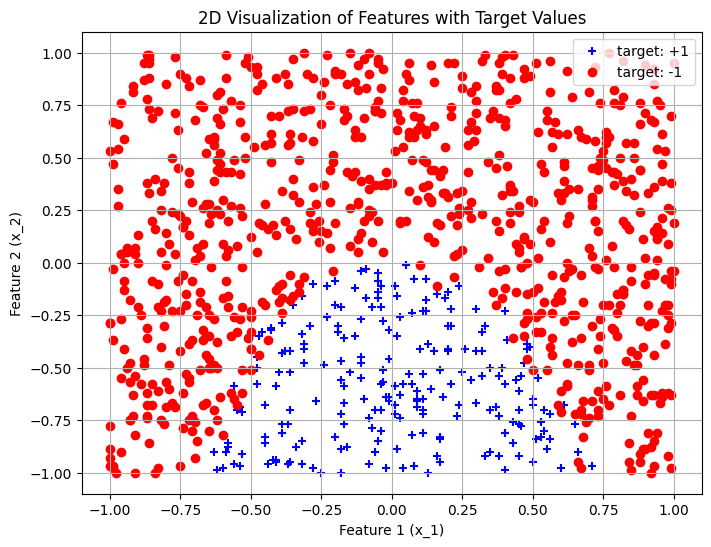

In [1]:
# Dataset ID = id:25--50--25
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("week2.csv", header=None, names=['x_1', 'x_2', 'target'])
print(df.head())  # check if the data read is correct

# Extract features and target
X1 = df.iloc[:, 0]  # (x_1)
X2 = df.iloc[:, 1]  # (x_2)
y = df.iloc[:, 2]   # target

# Plot the data
plt.figure(figsize=(8, 6))

# Plot data points where target is +1
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='blue', label="target: +1")

# Plot data points where target is -1
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='red', label="target: -1")

# Label the plot
plt.xlabel("Feature 1 (x_1)")
plt.ylabel("Feature 2 (x_2)")
plt.title("2D Visualization of Features with Target Values")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Logistic Regression Model
### Training the Model

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare the feature matrix (X) and target vector (y)
X = np.column_stack((X1, X2))
y = df['target']

# Split the data into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Report the parameters of the trained model
print("Logistic Regression Model Parameters:")
print(f"Intercept (bias): {logistic_model.intercept_}")
print(f"Coefficients (weights): {logistic_model.coef_}")

# Accuracy of the model on the test set
accuracy = logistic_model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy * 100:.4f}%")

Logistic Regression Model Parameters:
Intercept (bias): [-2.03951811]
Coefficients (weights): [[ 0.02342833 -2.96056409]]
Model accuracy on test set: 81.3333%


### Predictions and Decision Boundary

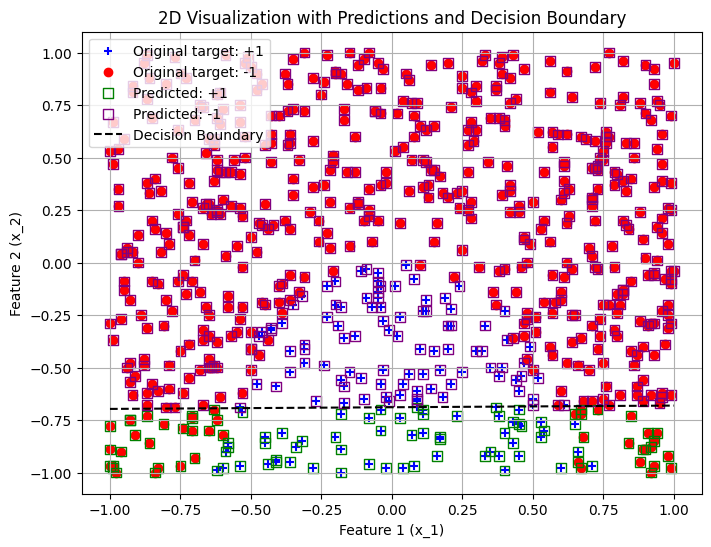

In [4]:
# Predict target values for the training data
y_train_pred = logistic_model.predict(X_train)

# Visualize the original training data and the predictions
plt.figure(figsize=(8, 6))

# Plot original training data
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], marker='+', color='blue', label="Original target: +1")
plt.scatter(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], marker='o', color='red', label="Original target: -1")

# Plot predictions with different markers and colors
plt.scatter(X_train[:, 0][y_train_pred == 1], X_train[:, 1][y_train_pred == 1], facecolors='none', edgecolors='g', marker='s', label="Predicted: +1", s=50)
plt.scatter(X_train[:, 0][y_train_pred == -1], X_train[:, 1][y_train_pred == -1], facecolors='none', edgecolors='purple', marker='s', label="Predicted: -1", s=50)

# Plot the decision boundary
# The equation of the decision boundary is x_2 = -(theta_1/theta_2) * x_1 - (theta_0 / theta_2)
theta_1, theta_2 = logistic_model.coef_[0]
b = logistic_model.intercept_[0]

# Generate values for x_1
x_values = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
# Compute the corresponding x_2 values
y_values = -(theta_1 / theta_2) * x_values - (b / theta_2)

# Plot the decision boundary as a line
plt.plot(x_values, y_values, color='black', linestyle='--', label="Decision Boundary")

# Label the plot
plt.xlabel("Feature 1 (x_1)")
plt.ylabel("Feature 2 (x_2)")
plt.title("2D Visualization with Predictions and Decision Boundary")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Linear SVM Classifier
### Training SVM Classifier

In [5]:
from sklearn.svm import LinearSVC

# Some range of values for the penalty parameter C
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Train LinearSVC models for each value of C and store the results
svm_models = {}  # Dictionary to store the models for each value of C

for C in C_values:
    # Create and train the LinearSVC model
    svm_model = LinearSVC(C=C, max_iter=10000, random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Store the trained model
    svm_models[C] = svm_model
    
    # Report the model parameters
    print(f"SVM Model with C={C}:")
    print(f"Intercept (bias): {svm_model.intercept_}")
    print(f"Coefficients (weights): {svm_model.coef_}")

    # Accuracy of the model on the test set
    accuracy = svm_model.score(X_test, y_test)
    print(f"Model accuracy on test set with C={C}: {accuracy * 100:.4f}%")


SVM Model with C=0.0001:
Intercept (bias): [-0.07006166]
Coefficients (weights): [[-0.00242203 -0.03078985]]
Model accuracy on test set with C=0.0001: 76.6667%
SVM Model with C=0.001:
Intercept (bias): [-0.3346396]
Coefficients (weights): [[-0.00913007 -0.22474599]]
Model accuracy on test set with C=0.001: 76.6667%
SVM Model with C=0.01:
Intercept (bias): [-0.55269237]
Coefficients (weights): [[-0.00558819 -0.62318119]]
Model accuracy on test set with C=0.01: 79.0000%
SVM Model with C=0.1:
Intercept (bias): [-0.67332801]
Coefficients (weights): [[ 0.0023067  -0.93407093]]
Model accuracy on test set with C=0.1: 79.6667%
SVM Model with C=1:
Intercept (bias): [-0.70610942]
Coefficients (weights): [[ 0.00325848 -1.0112188 ]]
Model accuracy on test set with C=1: 81.0000%
SVM Model with C=10:
Intercept (bias): [-0.7100923]
Coefficients (weights): [[ 0.00333132 -1.02038519]]
Model accuracy on test set with C=10: 81.3333%
SVM Model with C=100:
Intercept (bias): [-0.71049529]
Coefficients (weig

### Predictions and Decision Boundary

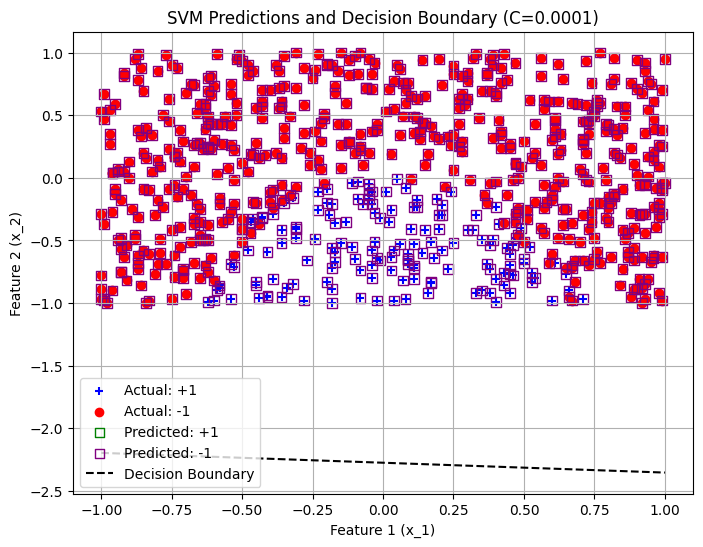

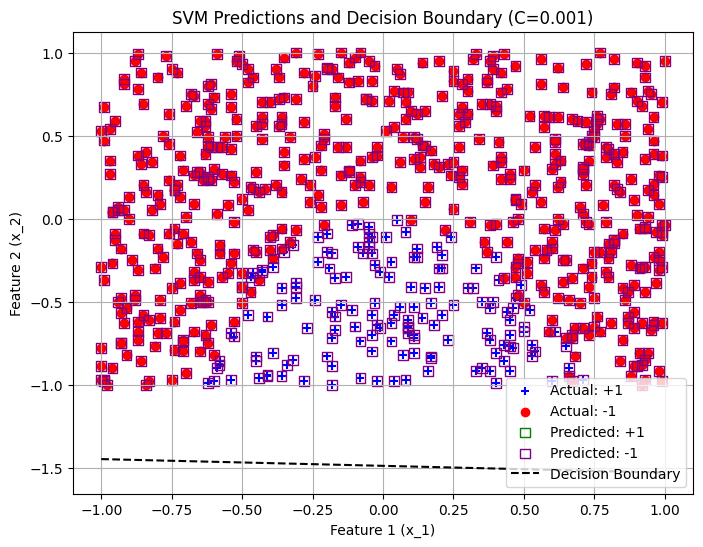

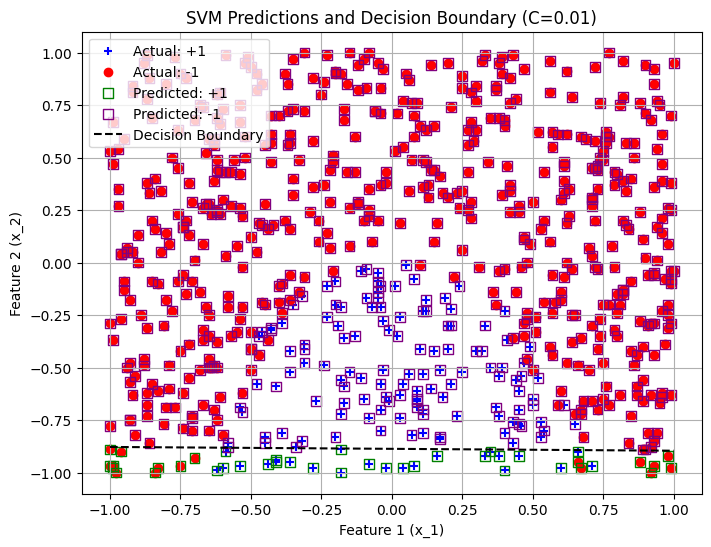

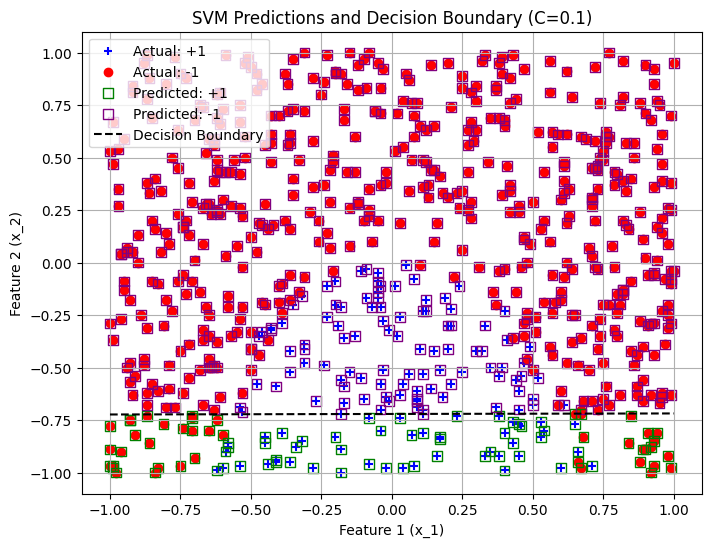

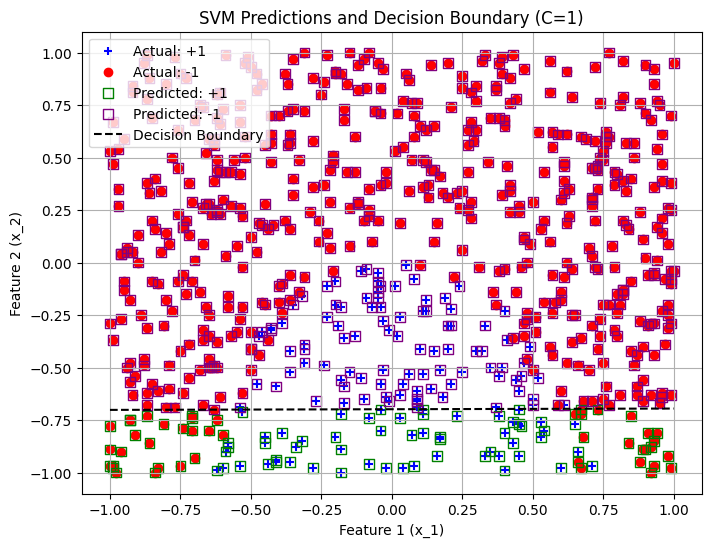

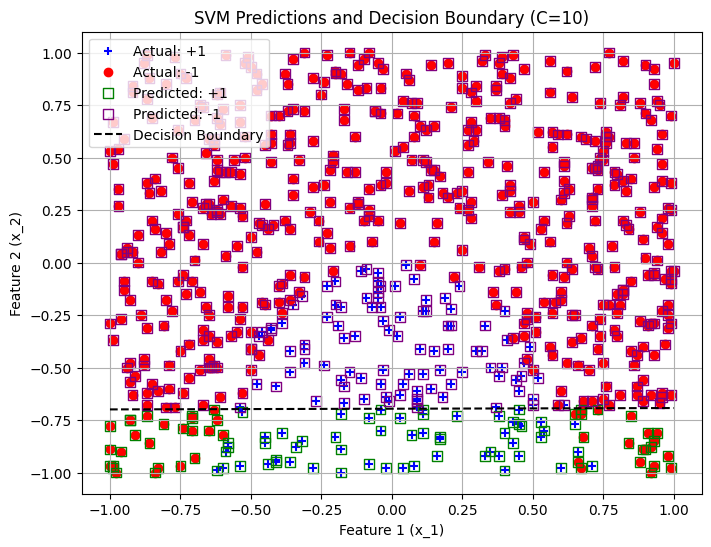

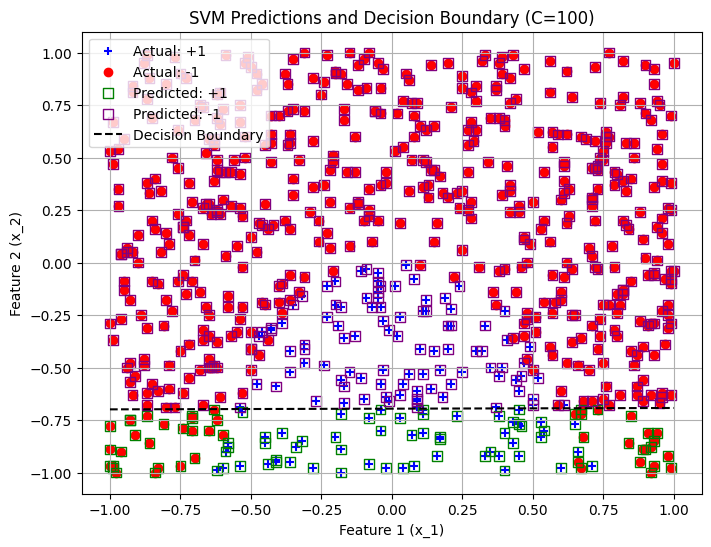

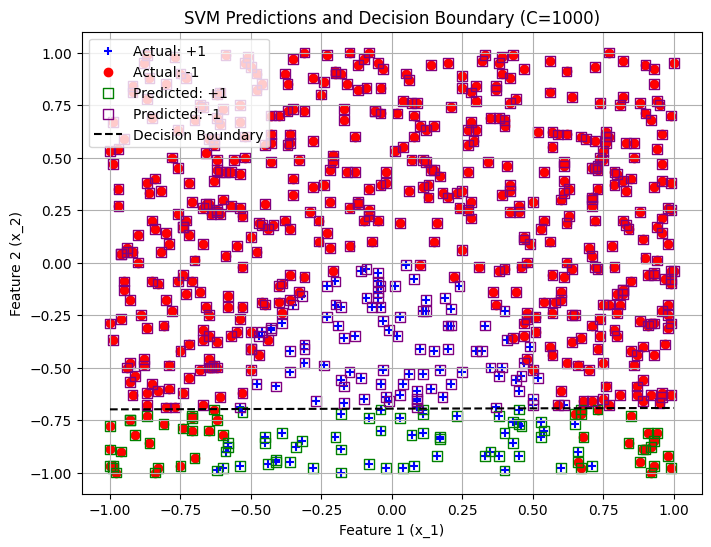

In [6]:
# Loop over each trained SVM model
for C, svm_model in svm_models.items():
    # Predict the target values for the training data
    y_train_pred = svm_model.predict(X_train)
    
    # Extract the coefficients and intercept for the decision boundary
    theta_1, theta_2 = svm_model.coef_[0]
    b = svm_model.intercept_[0]
    
    # Plot the actual training data and predicted values
    plt.figure(figsize=(8, 6))
    
    # Plot the actual data
    plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], marker='+', color='blue', label="Actual: +1")
    plt.scatter(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], marker='o', color='red', label="Actual: -1")
    
    # Plot the predicted data
    plt.scatter(X_train[:, 0][y_train_pred == 1], X_train[:, 1][y_train_pred == 1], facecolors='none', edgecolors='g', marker='s', label="Predicted: +1", s=50)
    plt.scatter(X_train[:, 0][y_train_pred == -1], X_train[:, 1][y_train_pred == -1], facecolors='none', edgecolors='purple', marker='s', label="Predicted: -1", s=50)
    
    # Plot the decision boundary
    # The equation of the decision boundary is x_2 = -(theta_1/theta_2) * x_1 - (intercept / theta_2)
    x_values = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
    y_values = -(theta_1 / theta_2) * x_values - (b / theta_2)
    plt.plot(x_values, y_values, color='black', linestyle='--', label="Decision Boundary")

    # Label the plot
    plt.xlabel("Feature 1 (x_1)")
    plt.ylabel("Feature 2 (x_2)")
    plt.title(f"SVM Predictions and Decision Boundary (C={C})")
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

## Extended Features with Quadratic Terms
### Training with Extended Features

In [7]:
# Create two additional features (squares of x_1 and x_2)
X1_squared = X_train[:, 0] ** 2
X2_squared = X_train[:, 1] ** 2

# Combine original features with squared features
X_train_new = np.column_stack((X_train[:, 0], X_train[:, 1], X1_squared, X2_squared))

# Train Logistic Regression on the new features
logreg_model = LogisticRegression()
logreg_model.fit(X_train_new, y_train)

# Report the model parameters
print("Logistic Regression Model with Squared Features:")
print(f"Intercept (bias): {logreg_model.intercept_}")
print(f"Coefficients (weights): {logreg_model.coef_}")

# Accuracy of the model on the test set
X1_squared_test = X_test[:, 0] ** 2
X2_squared_test = X_test[:, 1] ** 2
X_test_new = np.column_stack((X_test[:, 0], X_test[:, 1], X1_squared_test, X2_squared_test))

test_accuracy = logreg_model.score(X_test_new, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.4f}%")

Logistic Regression Model with Squared Features:
Intercept (bias): [-0.44046631]
Coefficients (weights): [[ 0.1917642  -4.6219512  -7.24965687 -0.42192419]]
Test Accuracy: 96.0000%


### Visualizing Predictions with Extended Features

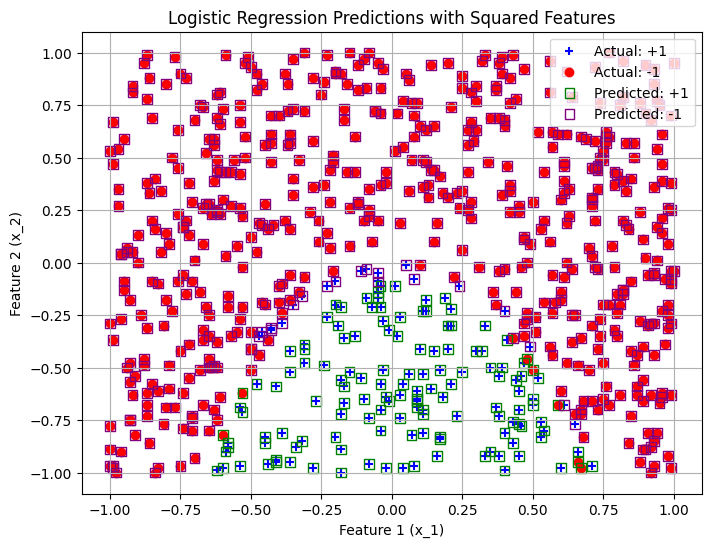

Comparing training accuracies for the three cases:
Simple Logistic Regression Model accuracy on training set: 80.4006
SVM Model accuracy on training set with C=10: 81.3333%
Logistic Regression Model With Squared Features accuracy on training set: 96.1373%


In [8]:
# Predict the target values using the logistic regression model with squared features
y_train_pred = logreg_model.predict(X_train_new)

# Plot the actual target values and predicted values
plt.figure(figsize=(8, 6))

# Plot actual training data
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], marker='+', color='blue', label="Actual: +1")
plt.scatter(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], marker='o', color='red', label="Actual: -1")

# Plot predicted values
plt.scatter(X_train[:, 0][y_train_pred == 1], X_train[:, 1][y_train_pred == 1], facecolors='none', edgecolors='g', marker='s', label="Predicted: +1", s=50)
plt.scatter(X_train[:, 0][y_train_pred == -1], X_train[:, 1][y_train_pred == -1], facecolors='none', edgecolors='purple', marker='s', label="Predicted: -1", s=50)

# Label the plot
plt.xlabel("Feature 1 (x_1)")
plt.ylabel("Feature 2 (x_2)")
plt.title("Logistic Regression Predictions with Squared Features")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Compare training accuracy for all three models for discussion
print("\033[1mComparing training accuracies for the three cases:\033[0m")
accuracy_simple_logistic = logistic_model.score(X_train, y_train)
print(f"Simple Logistic Regression Model accuracy on training set: {accuracy_simple_logistic * 100:.4f}")

accuracy_svm = svm_models.get(10).score(X_train, y_train)
print(f"SVM Model accuracy on training set with C={10}: {accuracy * 100:.4f}%")

accuracy_logistic = logreg_model.score(X_train_new, y_train)
print(f"Logistic Regression Model With Squared Features accuracy on training set: {accuracy_logistic * 100:.4f}%")

### Compare with Baseline Predictor

In [9]:
# Determine the most common class in the training data
most_common_class = y_train.mode()[0]
print(f"Most common class: {most_common_class}")

# Create predictions using the baseline predictor on the test set
# The baseline predictor will always predict the most common class, thus
# Create a np array filled with the most common class and having same shape as y_test
y_baseline_pred_test = np.full_like(y_test, most_common_class)

# Calculate accuracy for the baseline predictor on the test set
baseline_accuracy_test = np.mean(y_baseline_pred_test == y_test)
print(f"Baseline Predictor Accuracy on Test Set: {baseline_accuracy_test * 100:.4f}%")

# Calculate accuracy for the logistic regression model on the test set
logreg_accuracy_test = logreg_model.score(X_test_new, y_test)
print(f"Logistic Regression Model Accuracy on Test Set: {logreg_accuracy_test * 100:.4f}%")



Most common class: -1
Baseline Predictor Accuracy on Test Set: 76.6667%
Logistic Regression Model Accuracy on Test Set: 96.0000%


### Visualizing Decision Boundary for Quadratic Features

### Decision Boundary Derivation

For the logistic regression model with features $$X_1, X_2, X_1^2, X_2^2,$$ the decision boundary can be defined as:

$$
\theta^T \cdot X = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_1^2 + \theta_4 X_2^2 = 0
$$

This is a quadratic equation in terms of $X_2$. Rearranging the equation gives us:

$$
\theta_4 X_2^2 + \theta_2 X_2 + (\theta_0 + \theta_1 X_1 + \theta_3 X_1^2) = 0
$$

### Quadratic Formula

The roots of this quadratic equation can be computed using the quadratic formula:

$$
X_2 = \frac{-\theta_2 \pm \sqrt{\theta_2^2 - 4\theta_4(\theta_0 + \theta_1 X_1 + \theta_3 X_1^2)}}{2\theta_4}
$$


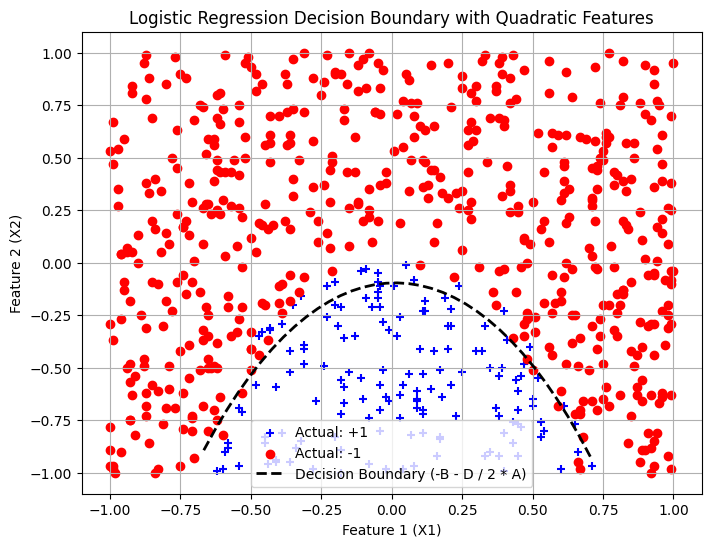

In [10]:
# Extract model parameters
intercept = logreg_model.intercept_[0]
coefficients = logreg_model.coef_[0]

# Create a grid for X1 values
x1_range = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)
x2_boundary_positive = []
x2_boundary_negative = []

# Calculate decision boundary (both roots for visualization)
for x1 in x1_range:
    # Coefficients for the quadratic equation (see the derivation above)
    A = coefficients[3]  # coefficient for X2^2
    B = coefficients[1]  # coefficient for X2
    C = intercept + coefficients[0] * x1 + coefficients[2] * x1**2  # constant term

    # Calculate the discriminant
    D = B**2 - 4 * A * C

    if D >= 0:  # Only compute real roots if the discriminant is non-negative
        # Calculate the roots based on the positive and negative case
        x2_positive = (-B + np.sqrt(D)) / (2 * A)
        x2_negative = (-B - np.sqrt(D)) / (2 * A)
        x2_boundary_positive.append((x1, x2_positive)) # Irrelevant for this case
        x2_boundary_negative.append((x1, x2_negative))

# Convert the decision boundary points into two separate lists for plotting
# The values corresponding to -B + D / 2 * A case are irrelevant - not moving forward with it anymore
x1_vals_positive = [point[0] for point in x2_boundary_positive]
x2_vals_positive = [point[1] for point in x2_boundary_positive]
# The values corresponding to -B - D / 2 * A case are relevant as the decision boundary passes through the datapoints
x1_vals_negative = [point[0] for point in x2_boundary_negative]
x2_vals_negative = [point[1] for point in x2_boundary_negative]

# Show decision boundary only in the relevant region
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x1_vals_negative = np.array(x1_vals_negative)
x2_vals_negative = np.array(x2_vals_negative)

valid_indices = (x2_vals_negative >= y_min) & (x2_vals_negative <= y_max)
x1_vals_negative = x1_vals_negative[valid_indices]
x2_vals_negative = x2_vals_negative[valid_indices]

# Plot the results
plt.figure(figsize=(8, 6))

# Plot actual training data
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], marker='+', color='b', label="Actual: +1")
plt.scatter(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], marker='o', color='r', label="Actual: -1")

# Plot the decision boundary
# plt.plot(x1_vals_positive, x2_vals_positive, color='g', linewidth=2, linestyle='--', label="Decision Boundary (-B + D / 2 * A)")
plt.plot(x1_vals_negative, x2_vals_negative, color='black', linewidth=2, linestyle='--', label="Decision Boundary (-B - D / 2 * A)")

# Label the plot
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Logistic Regression Decision Boundary with Quadratic Features")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
